In [445]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

data = pd.read_csv("features_30_sec.csv")
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [11]:
genre_map = {"blues": 0, "classical": 1, "country": 2, "disco": 3, "hiphop": 4, "jazz": 5,
             "metal": 6, "pop": 7, "reggae": 8, "rock": 9}
data['label'] = data['label'].map(genre_map)
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,0
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,0
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,0
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,0
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,0


In [21]:
from sklearn.model_selection import train_test_split

y = data['label'].values
X = data.iloc[:, 1:-1].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


tree = DecisionTreeClassifier()
#1, 2, 3, 4, 5, 10, 15, 20, None
param_grid = {
    'max_depth': [15],
    "criterion": ["entropy"],
    'random_state':  [28],
}
gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print(f"Test Accuracy: {gs.score(X_test, y_test)*100:0.3f}%")

Best Accuracy: 61.29%
Best Params: {'criterion': 'entropy', 'max_depth': 15, 'random_state': 28}
Test Accuracy: 64.333%


In [113]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
#84: 80.667%
#171: 81.333%
#261: 81.667%
params = {
    "n_estimators": [252],
    "random_state": [261],
    "max_depth": [15],
    "criterion": ["gini"],
    "oob_score": [True]
}

gs2 = GridSearchCV(estimator=rf,
                  param_grid=params,
                  scoring='accuracy',
                  cv=5)

gs2.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs2.best_score_*100))
print('Best Params: %s' % gs2.best_params_)
print(f"Test Accuracy: {gs2.score(X_test, y_test)*100:0.3f}%")

Best Accuracy: 75.86%
Best Params: {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 252, 'oob_score': True, 'random_state': 261}
Test Accuracy: 81.667%


In [52]:
forest = RandomForestClassifier(n_estimators=252, random_state=171, max_depth=15, criterion="gini")
forest.fit(X_train, y_train)
print(f"Test Accuracy: {forest.score(X_test, y_test)*100:0.3f}%")

Test Accuracy: 81.333%


array([0.03781445, 0.04188093, 0.02875554, 0.02558106, 0.03097329,
       0.01920131, 0.02453142, 0.02471368, 0.01255682, 0.02329016,
       0.02193438, 0.01811777, 0.01732598, 0.01399005, 0.02373727,
       0.01544429, 0.04438257, 0.00851204, 0.02788348, 0.01735062,
       0.01479707, 0.0099435 , 0.01348194, 0.01486209, 0.029429  ,
       0.01767241, 0.01313447, 0.02129293, 0.01888644, 0.01486987,
       0.01453518, 0.0156602 , 0.01670356, 0.01364016, 0.01993072,
       0.01135942, 0.01198043, 0.01626784, 0.01361949, 0.01097835,
       0.02018987, 0.00954041, 0.01353429, 0.01067268, 0.01048249,
       0.00903863, 0.01040428, 0.00861303, 0.00992978, 0.01040656,
       0.01445577, 0.00897496, 0.01023024, 0.01215905, 0.01045364,
       0.01156937, 0.01107031, 0.0172525 ])

In [80]:
importances = forest.feature_importances_
sorted_imp = np.argsort(importances)[::-1]
sorted_imp
importances

array([0.03781445, 0.04188093, 0.02875554, 0.02558106, 0.03097329,
       0.01920131, 0.02453142, 0.02471368, 0.01255682, 0.02329016,
       0.02193438, 0.01811777, 0.01732598, 0.01399005, 0.02373727,
       0.01544429, 0.04438257, 0.00851204, 0.02788348, 0.01735062,
       0.01479707, 0.0099435 , 0.01348194, 0.01486209, 0.029429  ,
       0.01767241, 0.01313447, 0.02129293, 0.01888644, 0.01486987,
       0.01453518, 0.0156602 , 0.01670356, 0.01364016, 0.01993072,
       0.01135942, 0.01198043, 0.01626784, 0.01361949, 0.01097835,
       0.02018987, 0.00954041, 0.01353429, 0.01067268, 0.01048249,
       0.00903863, 0.01040428, 0.00861303, 0.00992978, 0.01040656,
       0.01445577, 0.00897496, 0.01023024, 0.01215905, 0.01045364,
       0.01156937, 0.01107031, 0.0172525 ])

In [81]:
data.columns[1:-1]

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'],
      dtype='

In [90]:
col_ranks = []

for i in range(0, 58):
    col = []
    col.append(importances[i])
    col.append(data.columns[1:-1][i])
    col_ranks.append(col)
col_ranks = sorted(col_ranks, key=lambda x: x[0])

new_order = []
new_imp = []
for ls in col_ranks:
    new_imp.append(ls[0])
    new_order.append(ls[1])

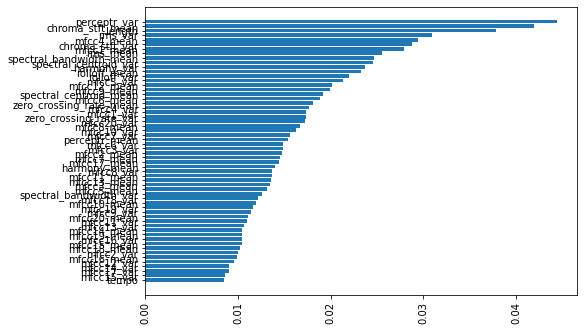

In [93]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(new_order,new_imp)
plt.xticks(rotation=0)
plt.show()

In [382]:
data3 = pd.read_csv("features_3_sec.csv")

genre_map = {"blues": 0, "classical": 1, "country": 2, "disco": 3, "hiphop": 4, "jazz": 5,
             "metal": 6, "pop": 7, "reggae": 8, "rock": 9}
data3['label'] = data3['label'].map(genre_map)
data3.head()

y3 = data3['label'].values
X3 = data3.iloc[:, 1:-1].values

from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

minmax = MinMaxScaler()
model=minmax.fit(X3)
minmax=model.transform(X3)

X3_train, X3_test, y3_train, y3_test = \
    train_test_split(X3, y3, test_size = 0.3, random_state = 0, stratify = y3)

sX3_train = scaler.fit_transform(X3_train)
sX3_test = scaler.fit_transform(X3_test)

In [435]:
from sklearn.ensemble import RandomForestClassifier
import time

t1 = time.time()
rf3 = RandomForestClassifier()

params = {
    "n_estimators": [380],
    "random_state": [261],
    "max_depth": [20],
    "criterion": ["gini"],
    "oob_score": [True],
    "warm_start": [True, False]
}

gs3 = GridSearchCV(estimator=rf,
                  param_grid=params,
                  scoring='accuracy',
                  cv=5)

gs3.fit(X3_train, y3_train)

print(str(time.time() - t1))
print('Best Accuracy: %.2f%%' % (gs3.best_score_*100))
print('Best Params: %s' % gs3.best_params_)
print(f"Test Accuracy: {gs3.score(X3_test, y3_test)*100:0.3f}%")

3055.6707696914673
Best Accuracy: 85.16%
Best Params: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 380, 'oob_score': True, 'random_state': 261, 'warm_start': True}
Test Accuracy: 87.287%


In [436]:
#2: 94.333%
#for i in range(26, 31):
t1 = time.time()
forest3 = RandomForestClassifier(n_estimators=380, random_state=261, max_depth=20, criterion="gini", oob_score=True, warm_start=True)
forest3.fit(sX3_train, y3_train)
print(f"Test Accuracy: {forest3.score(sX3_test, y3_test)*100:0.3f}%")
print(str(time.time()-t1), str(i))

Test Accuracy: 86.520%
15.568002939224243 2996


In [437]:
importances3 = forest3.feature_importances_
sorted_imp3 = np.argsort(importances3)[::-1]
sorted_imp
importances3

data.columns[1:-1]
importances3

array([0.        , 0.03479653, 0.0188099 , 0.03209041, 0.03593364,
       0.02244464, 0.02093694, 0.0326782 , 0.01368739, 0.02450956,
       0.02293851, 0.02047344, 0.01135266, 0.02039979, 0.02601747,
       0.02630581, 0.05045692, 0.01066636, 0.02687856, 0.02309706,
       0.0180577 , 0.01060899, 0.01921656, 0.0173369 , 0.03245899,
       0.01663923, 0.01493199, 0.01933365, 0.02139   , 0.01564912,
       0.01611993, 0.01361038, 0.01912212, 0.01235193, 0.02240135,
       0.01028207, 0.01261926, 0.01173926, 0.01673956, 0.00930319,
       0.01784428, 0.00899319, 0.01610424, 0.00889923, 0.0119059 ,
       0.00830573, 0.01301845, 0.00777158, 0.01060245, 0.00816142,
       0.01426128, 0.0079792 , 0.0105615 , 0.00910553, 0.00981666,
       0.01061626, 0.01059597, 0.01107118])

In [438]:
col_ranks3 = []

for i in range(0, 58):
    col = []
    col.append(importances[i])
    col.append(data.columns[1:-1][i])
    col_ranks3.append(col)
col_ranks3 = sorted(col_ranks, key=lambda x: x[0])

new_order3 = []
new_imp3 = []
for ls in col_ranks3:
    new_imp3.append(ls[0])
    new_order3.append(ls[1])

In [474]:
top_order = new_order3[53:58]
top_order

['mfcc4_mean', 'rms_var', 'length', 'chroma_stft_mean', 'perceptr_var']

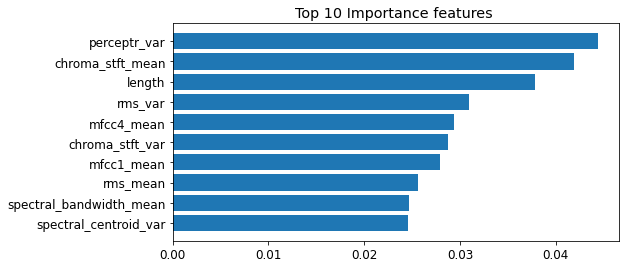

In [479]:
f, ax = plt.subplots(figsize=(8, 4))

ax.barh(new_order3[48:58],new_imp3[48:58])
plt.title("Top 10 Importance features ")
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Accuracy')

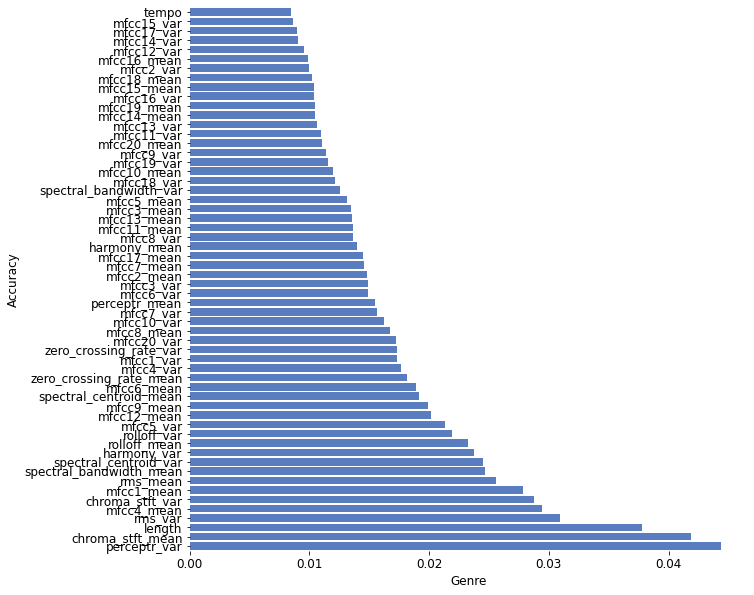

In [460]:
f, ax = plt.subplots(figsize=(10, 10));
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
sns.barplot(x=new_imp3, y=new_order3, color="b", orient='h')
sns.despine(left=True, bottom=True)

plt.xlabel("Genre")
plt.ylabel("Accuracy")

In [398]:
#box_dict = 

set(data3['label'].values)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Text(0, 0.5, 'Mean decrease in impurity')

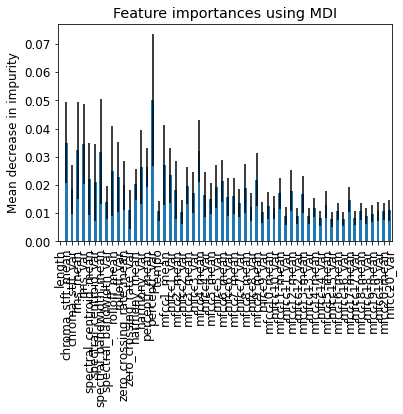

In [386]:
std = np.std([tree.feature_importances_ for tree in forest3.estimators_], axis=0)

forest_importances = pd.Series(importances3, index=data.columns[1:-1])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [268]:
from sklearn import metrics

y3_pred = forest3.predict(X3_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y_pred)))

Mean Absolute Error: 0.5221888555221889
Mean Squared Error: 2.6436436436436437
Root Mean Squared Error: 1.6259285481360009


In [158]:
#"rmse = []
#for i in range(1, 201):
forest3 = RandomForestClassifier(n_estimators=i, random_state=2, max_depth=20, criterion="gini", oob_score=True)
forest3.fit(X3_train, y3_train)
y_pred = forest3.predict(X3_test)
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


1
2
3
4


C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


5


C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


6


C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


7


C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


8


C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


9


C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


10


C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


11


C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


12


C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


13


C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


14


C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


15


C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


16


C:\Users\mille\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


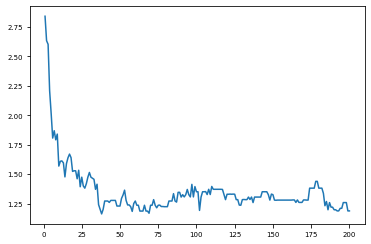

38


In [166]:
plt.plot(range(1,201), rmse)
plt.show()

min(rmse)
i=0
for r in rmse:
    i += 1
    if r == min(rmse):
        print(i)

In [193]:
mod_data = data3

col_ranks3
low_importance = []
high_importance = []
for ls in col_ranks3:
    if ls[0] < 0.01:
        low_importance.append(ls[1])
        continue
    high_importance.append(ls[1])
        
low_importance


for col in mod_data.columns:
    if col in low_importance:
        del mod_data[col]
        

mod_y = mod_data['label'].values
mod_X = mod_data.iloc[:, 1:-1].values

modX_train, modX_test, mody_train, mody_test = \
    train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [196]:
forest3 = RandomForestClassifier(n_estimators=412, random_state=2, max_depth=20, criterion="gini", oob_score=True)
forest3.fit(modX_train, mody_train)
print(f"Test Accuracy: {forest3.score(X_test, y_test)*100:0.3f}%")

Test Accuracy: 81.333%


In [358]:
from collections import Counter
genre_accuracy = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
errors = []
i = 0 
for i in range(len(y3_pred)):
    if y3_test[i] != y3_pred[i]:
        error = []
        error.append(y3_pred[i])
        error.append(y3_test[i])
        errors.append(error)
errors
print(errors)
pred = Counter()
Counter((y_pred))

hundred = Counter(y3_test)
errors

for e in errors:
    hundred[e[1]] -= 1
hundred

acc = {}
for g in range(len(list(set(data["label"].values)))):
    acc[list(set(data["label"].values))[g]] = round(hundred[g] / 30, 4) * 10
acc=dict(sorted(acc.items(),key= lambda x:x[1]))
acc

[[2, 1], [9, 2], [7, 8], [2, 9], [6, 9], [0, 5], [6, 9], [9, 7], [6, 9], [6, 9], [8, 4], [3, 9], [5, 2], [7, 4], [2, 9], [8, 7], [3, 5], [8, 3], [2, 8], [6, 9], [5, 0], [0, 9], [3, 8], [9, 7], [2, 8], [3, 4], [0, 2], [1, 5], [3, 9], [9, 2], [6, 0], [9, 3], [8, 4], [3, 7], [8, 3], [7, 5], [6, 9], [8, 4], [2, 3], [6, 9], [4, 7], [7, 5], [7, 9], [9, 7], [8, 3], [0, 8], [2, 9], [3, 7], [6, 3], [1, 5], [9, 3], [0, 9], [4, 8], [8, 2], [7, 4], [8, 7], [6, 9], [5, 9], [1, 5], [7, 5], [7, 4], [2, 5], [3, 9], [9, 3], [6, 9], [8, 2], [9, 2], [3, 4], [8, 2], [6, 9], [1, 5], [5, 0], [8, 4], [6, 9], [2, 0], [3, 4], [6, 9], [1, 7], [5, 1], [5, 2], [1, 9], [9, 4], [5, 7], [6, 0], [5, 3], [6, 9], [3, 9], [8, 7], [8, 4], [3, 9], [5, 9], [3, 9], [0, 3], [2, 5], [2, 9], [3, 9], [7, 4], [4, 7], [8, 3], [6, 4], [7, 4], [0, 2], [9, 2], [5, 7], [7, 5], [5, 1], [5, 0], [1, 5], [8, 2], [8, 0], [2, 0], [8, 2], [6, 9], [9, 2], [8, 4], [5, 2], [3, 9], [4, 3], [1, 4], [2, 9], [0, 2], [2, 0], [1, 3], [5, 2], [8, 6],

{'rock': 73.0,
 'reggae': 81.667,
 'classical': 84.333,
 'country': 84.667,
 'jazz': 86.333,
 'pop': 89.0,
 'metal': 89.0,
 'disco': 90.0,
 'blues': 95.333,
 'hiphop': 97.0}

Text(0, 0.5, 'Accuracy')

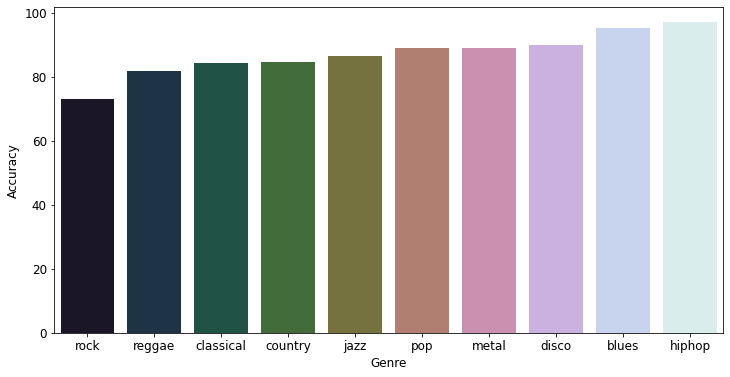

In [429]:
import seaborn as sns

genres = list(acc.keys())
values = list(acc.values())

f, ax = plt.subplots(figsize=(12, 6));
sns.barplot(x=genres, y=values, palette = 'cubehelix')

plt.xlabel("Genre")
plt.ylabel("Accuracy")



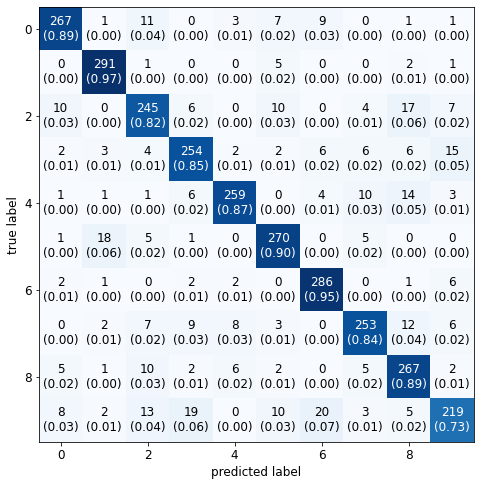

In [389]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

confmat = confusion_matrix(y3_test, y3_pred)

fig, ax = plot_confusion_matrix(conf_mat=confmat, show_absolute=True, show_normed=True, figsize=(8,8))
plt.show()

In [390]:
acc

{'rock': 73.0,
 'reggae': 81.667,
 'classical': 84.333,
 'country': 84.667,
 'jazz': 86.333,
 'pop': 89.0,
 'metal': 89.0,
 'disco': 90.0,
 'blues': 95.333,
 'hiphop': 97.0}

In [405]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

t1 = time.time()
xgb = XGBClassifier(n_estimators = 1000, learning_rate = 0.05, use_label_encoder = False)
xgb.fit(X3_train, y3_train)

xgb_pred = xgb.predict(X3_test)
print(str(time.time()-t1), str(i))
print("Accuracy: " + str(round(accuracy_score(y3_test, xgb_pred), 5)))

[20:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
172.41306281089783 2996
Accuracy: 0.89923


In [421]:
x = XGBClassifier()

params = {
    "n_estimators": [380],
    "random_state": [261],
    "max_depth": [20],
    "criterion": ["gini"],
    "oob_score": [True]
}

gs3 = GridSearchCV(estimator=rf,
                  param_grid=params,
                  scoring='accuracy',
                  cv=2)
range(0[, 6e-2)

TypeError: 'float' object cannot be interpreted as an integer

In [430]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
import optuna


def optimization_objective(trial, X_train, y_train, cv=5):

    
    params =  {
            "n_estimators": trial.suggest_categorical("n_estimators", [1000]),
            "learning_rate": trial.suggest_categorical("learning_rate", [0.01, 0.03, 0.05]),
            "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
            "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }
    

    cv_iterator = StratifiedKFold(n_splits=cv, shuffle=True, random_state=123)

    cv_scores = np.zeros(cv)
    for idx, (train_sub_idx, valid_idx) in enumerate(cv_iterator.split(X_train, y_train)):
        
        X_train_sub, X_valid = X_train[train_sub_idx], X_train[valid_idx]
        y_train_sub, y_valid = y_train[train_sub_idx], y_train[valid_idx]
        

        model = XGBClassifier(**params, random_state=123, use_label_encoder=False, tree_method = "hist")
        
        model.fit(
            X_train_sub,
            y_train_sub,
            verbose=False,
            eval_set=[(X_valid, y_valid)],
            eval_metric="auc",
            early_stopping_rounds=100,
        )
        
        preds = model.score(X_valid, y_valid)
        
        cv_scores[idx] = preds

    return np.mean(cv_scores)

In [431]:
study = optuna.create_study(direction="maximize", study_name="XGBoost Classifier")

def func(trial):
    return optimization_objective(trial, X3_train, y3_train)

study.optimize(func, n_trials = 10);

[I 2021-12-05 22:45:01,726] A new study created in memory with name: XGBoost Classifier
[I 2021-12-05 22:49:45,469] Trial 0 finished with value: 0.8777328175346992 and parameters: {'n_estimators': 1000, 'learning_rate': 0.03, 'lambda': 0.01026758690335571, 'alpha': 0.05467398251920524}. Best is trial 0 with value: 0.8777328175346992.
[I 2021-12-05 22:53:41,418] Trial 1 finished with value: 0.8797348606863066 and parameters: {'n_estimators': 1000, 'learning_rate': 0.05, 'lambda': 3.3718508613764945e-08, 'alpha': 0.00029408341910909676}. Best is trial 1 with value: 0.8797348606863066.
[I 2021-12-05 22:59:13,869] Trial 2 finished with value: 0.87916343269922 and parameters: {'n_estimators': 1000, 'learning_rate': 0.03, 'lambda': 1.6533897066903838e-08, 'alpha': 0.00015560306377516612}. Best is trial 1 with value: 0.8797348606863066.
[I 2021-12-05 23:03:19,222] Trial 3 finished with value: 0.8830239461867817 and parameters: {'n_estimators': 1000, 'learning_rate': 0.05, 'lambda': 0.00046840

KeyboardInterrupt: 